# CKD Transmission Tutorial: ArtTransPure with OpaCKD

Hajime Kawahara with Claude Code, July 2 (2025)

This tutorial demonstrates how to use the Correlated K-Distribution (CKD) method for atmospheric transmission calculations with ExoJAX. Transmission spectroscopy is a key technique for characterizing exoplanet atmospheres by observing starlight passing through the planetary atmosphere.

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
from jax import config

# ExoJAX imports
from exojax.test.emulate_mdb import mock_mdbExomol, mock_wavenumber_grid
from exojax.opacity import OpaCKD, OpaPremodit
from exojax.rt import ArtTransPure
from exojax.test.data import get_testdata_filename, TESTDATA_CO_EXOMOL_PREMODIT_TRANSMISSION_REF

# Enable 64-bit precision for accurate calculations
config.update("jax_enable_x64", True)

print("ExoJAX CKD Tutorial: Transmission Spectroscopy")
print("=============================================")

ExoJAX CKD Tutorial: Transmission Spectroscopy


## 1. Setup Atmospheric Model and Molecular Database

First, we'll set up our atmospheric model for transmission spectroscopy calculations.

In [2]:
# Setup wavenumber grid and molecular database
nu_grid, wav, res = mock_wavenumber_grid()
print(f"Wavenumber grid: {len(nu_grid)} points from {nu_grid[0]:.1f} to {nu_grid[-1]:.1f} cm⁻¹")
print(f"Spectral resolution: {res:.1f}")

# Create mock H2O molecular database
mdb = mock_mdbExomol("H2O")
print(f"Molecular database: {mdb.nurange[0]:.1f} - {mdb.nurange[1]:.1f} cm⁻¹")

# Setup atmospheric radiative transfer for transmission
art = ArtTransPure(
    pressure_top=1.0e-8, 
    pressure_btm=1.0e2, 
    nlayer=50,  # Fewer layers for transmission calculations
    integration="simpson"  # Simpson integration for better accuracy
)

print(f"Atmospheric layers: {art.nlayer}")
print(f"Pressure range: {art.pressure_top:.1e} - {art.pressure_btm:.1e} bar")
print(f"Integration method: {art.integration}")

xsmode =  modit
xsmode assumes ESLOG in wavenumber space: xsmode=modit
Your wavelength grid is in ***  ascending  *** order
The wavenumber grid is in ascending order by definition.
Please be careful when you use the wavelength grid.
Wavenumber grid: 20000 points from 4329.0 to 4363.0 cm⁻¹
Spectral resolution: 2556525.8
xsmode =  modit
xsmode assumes ESLOG in wavenumber space: xsmode=modit
Your wavelength grid is in ***  ascending  *** order
The wavenumber grid is in ascending order by definition.
Please be careful when you use the wavelength grid.
radis== 0.15.2
HITRAN exact name= H2(16O)
radis engine =  vaex


/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:85: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/database/api.py:134: UserWarning: The current version of radis does not support broadf_download (requires >=0.16).
  warnings.warn(msg, UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning

Molecule:  H2O
Isotopologue:  1H2-16O
Background atmosphere:  H2
ExoMol database:  None
Local folder:  H2O/1H2-16O/SAMPLE
Transition files: 
	 => File 1H2-16O__SAMPLE__04300-04400.trans
Broadener:  H2
Broadening code level: a1
DataFrame (self.df) available.
Molecular database: 4329.0 - 4363.0 cm⁻¹
integration:  simpson
Simpson integration, uses the chord optical depth at the lower boundary and midppoint of the layers.
Atmospheric layers: 50
Pressure range: 1.0e-08 - 1.0e+02 bar
Integration method: simpson


/home/kawahara/exojax/src/exojax/rt/common.py:40: UserWarning: nu_grid is not given. specify nu_grid when using 'run' 
  warnings.warn(


## 2. Define Atmospheric and Planetary Parameters

We'll create atmospheric profiles and define planetary parameters for transmission calculations.

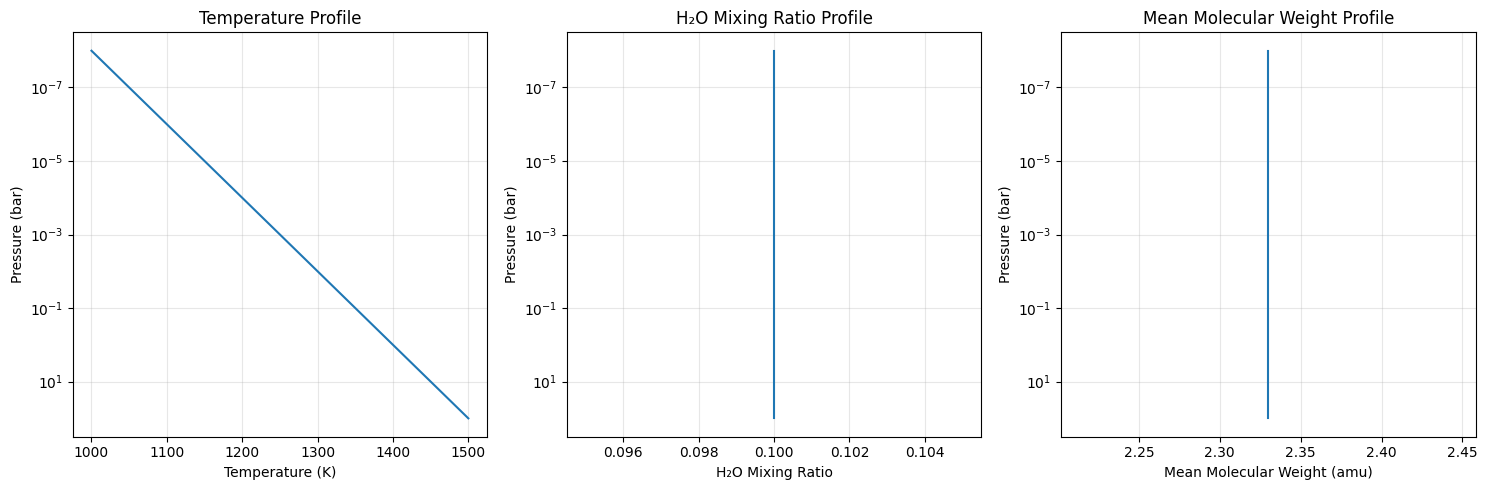

Temperature range: 1000 - 1500 K
H2O mixing ratio: 0.1 (constant)
Mean molecular weight: 2.33 amu (constant)
Planet radius: 1.0 R_Jupiter
Surface gravity: 2479 cm/s² (1.0 × Jupiter)


In [3]:
# Create atmospheric profiles
Tarr = np.linspace(1000.0, 1500.0, 50)  # Temperature profile
mmr_arr = np.full(50, 0.1)  # Constant H2O mixing ratio
mean_molecular_weight = np.full(50, 2.33)  # Mean molecular weight (H2-dominated)

# Planetary parameters (Jupiter-like)
radius_btm = 6.9e9  # Planet radius at bottom of atmosphere (cm)
gravity = 2478.57   # Surface gravity (cm/s²)

# Plot atmospheric profiles
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Temperature profile
ax1.semilogy(Tarr, art.pressure)
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Pressure (bar)')
ax1.set_title('Temperature Profile')
ax1.grid(True, alpha=0.3)
ax1.invert_yaxis()

# Mixing ratio profile
ax2.semilogy(mmr_arr, art.pressure)
ax2.set_xlabel('H₂O Mixing Ratio')
ax2.set_ylabel('Pressure (bar)')
ax2.set_title('H₂O Mixing Ratio Profile')
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()

# Mean molecular weight profile
ax3.semilogy(mean_molecular_weight, art.pressure)
ax3.set_xlabel('Mean Molecular Weight (amu)')
ax3.set_ylabel('Pressure (bar)')
ax3.set_title('Mean Molecular Weight Profile')
ax3.grid(True, alpha=0.3)
ax3.invert_yaxis()

plt.tight_layout()
plt.show()

print(f"Temperature range: {np.min(Tarr):.0f} - {np.max(Tarr):.0f} K")
print(f"H2O mixing ratio: {mmr_arr[0]:.1f} (constant)")
print(f"Mean molecular weight: {mean_molecular_weight[0]:.2f} amu (constant)")
print(f"Planet radius: {radius_btm/6.9e9:.1f} R_Jupiter")
print(f"Surface gravity: {gravity:.0f} cm/s² ({gravity/2478.57:.1f} × Jupiter)")

## 3. Setup Standard Line-by-Line Opacity Calculator

First, we'll compute the standard high-resolution transmission spectrum using line-by-line calculations.

In [5]:
# Initialize standard opacity calculator (Premodit)
base_opa = OpaPremodit(mdb, nu_grid, auto_trange=[800.0, 1600.0])
print(f"Base opacity calculator: {base_opa.__class__.__name__}")

# Compute line-by-line cross-sections and transmission spectrum
print("\nComputing line-by-line transmission spectrum...")
xsmatrix = base_opa.xsmatrix(Tarr, art.pressure)
dtau = art.opacity_profile_xs(xsmatrix, mmr_arr, base_opa.mdb.molmass, gravity)
transit_lbl = art.run(dtau, Tarr, mean_molecular_weight, radius_btm, gravity)

print(f"Line-by-line spectrum computed!")
print(f"Transit radius ratio range: [{np.min(transit_lbl):.6f}, {np.max(transit_lbl):.6f}]")
print(f"Transit depth variation: {(np.max(transit_lbl) - np.min(transit_lbl))*1e6:.0f} ppm")

OpaPremodit: params automatically set.
default elower grid trange (degt) file version: 2
Robust range: 771.9537482657882 - 1647.2060977798953 K
OpaPremodit: Tref_broadening is set to  1131.3708498984759 K
max value of  ngamma_ref_grid : 21.825321843011604
min value of  ngamma_ref_grid : 13.242701248020088
ngamma_ref_grid grid : [13.24270058 15.00453705 17.00077107 19.26258809 21.8253231 ]
max value of  n_Texp_grid : 0.541
min value of  n_Texp_grid : 0.216
n_Texp_grid grid : [0.21599999 0.54100007]


uniqidx:   0%|          | 0/3 [00:00<?, ?it/s]

uniqidx: 100%|██████████| 3/3 [00:00<00:00, 8473.34it/s]

Premodit: Twt= 1383.2165049575465 K Tref= 840.335329973883 K
Making LSD:|####################| 100%
Base opacity calculator: OpaPremodit

Computing line-by-line transmission spectrum...


Line-by-line spectrum computed!
Transit radius ratio range: [1.042101, 1.109748]
Transit depth variation: 67647 ppm


## 4. Setup CKD Opacity Calculator and Compute Transmission

Now we'll initialize the CKD opacity calculator and compute the CKD transmission spectrum.

In [6]:
# Initialize CKD opacity calculator
opa_ckd = OpaCKD(
    base_opa,           # Base opacity calculator
    Ng=16,              # Number of g-ordinates for quadrature
    band_width=0.5      # Spectral band width
)

print(f"CKD Opacity Calculator Setup:")
print(f"  Number of g-ordinates (Ng): {opa_ckd.Ng}")
print(f"  Band width: {opa_ckd.band_width}")
print(f"  Number of spectral bands: {len(opa_ckd.nu_bands)}")
print(f"  Spectral range: {opa_ckd.nu_bands[0]:.1f} - {opa_ckd.nu_bands[-1]:.1f} cm⁻¹")

# Pre-compute CKD tables on temperature-pressure grid
print("\nPre-computing CKD tables...")
T_grid = np.linspace(np.min(Tarr), np.max(Tarr), 10)
P_grid = np.logspace(np.log10(np.min(art.pressure)), np.log10(np.max(art.pressure)), 10)
opa_ckd.precompute_tables(T_grid, P_grid)

# Get CKD cross-section tensor and compute CKD spectrum
print("Computing CKD transmission spectrum...")
xs_ckd = opa_ckd.xstensor_ckd(Tarr, art.pressure)
dtau_ckd = art.opacity_profile_xs_ckd(xs_ckd, mmr_arr, base_opa.mdb.molmass, gravity)
transit_ckd = art.run_ckd(dtau_ckd, Tarr, mean_molecular_weight, radius_btm, gravity, opa_ckd.ckd_info.weights)

print(f"CKD spectrum computed!")
print(f"CKD transit range: [{np.min(transit_ckd):.6f}, {np.max(transit_ckd):.6f}]")

CKD Opacity Calculator Setup:
  Number of g-ordinates (Ng): 16
  Band width: 0.5
  Number of spectral bands: 68
  Spectral range: 4329.3 - 4362.8 cm⁻¹

Pre-computing CKD tables...
Generated g-grid: 16 points, range [0.0053, 0.9947]
Processing 68 spectral bands...
  Band 1: [4329.0, 4329.5] cm⁻¹, 295 frequencies
  Band 2: [4329.5, 4330.0] cm⁻¹, 294 frequencies
  Band 3: [4330.0, 4330.5] cm⁻¹, 294 frequencies
  Band 4: [4330.5, 4331.0] cm⁻¹, 294 frequencies
  Band 5: [4331.0, 4331.5] cm⁻¹, 294 frequencies
  Band 6: [4331.5, 4332.0] cm⁻¹, 294 frequencies
  Band 7: [4332.0, 4332.5] cm⁻¹, 294 frequencies
  Band 8: [4332.5, 4333.0] cm⁻¹, 294 frequencies
  Band 9: [4333.0, 4333.5] cm⁻¹, 294 frequencies
  Band 10: [4333.5, 4334.0] cm⁻¹, 295 frequencies
  Band 11: [4334.0, 4334.5] cm⁻¹, 294 frequencies
  Band 12: [4334.5, 4335.0] cm⁻¹, 294 frequencies
  Band 13: [4335.0, 4335.5] cm⁻¹, 294 frequencies
  Band 14: [4335.5, 4336.0] cm⁻¹, 294 frequencies
  Band 15: [4336.0, 4336.5] cm⁻¹, 294 frequen

## 5. Compare Results and Visualize

Let's compare the CKD results with the line-by-line spectrum and compute band averages for validation.

In [7]:
# Compute reference band averages by direct integration
print("Computing reference band averages...")
transit_avg = []
band_edges = opa_ckd.band_edges

for band_idx in range(len(opa_ckd.nu_bands)):
    mask = (band_edges[band_idx, 0] <= nu_grid) & (nu_grid < band_edges[band_idx, 1])
    transit_avg.append(np.mean(transit_lbl[mask]))

transit_avg = np.array(transit_avg)

# Calculate accuracy metrics
res = np.sqrt(np.sum((transit_ckd - transit_avg)**2)/len(transit_ckd))/np.mean(transit_avg)
max_relative_error = np.max(np.abs((transit_ckd - transit_avg) / transit_avg))
resolution = opa_ckd.nu_bands[0]/(band_edges[0, 1] - band_edges[0, 0])
transit_diff_ppm = np.abs((transit_ckd - transit_avg) * 1e6)

print(f"CKD Accuracy Assessment:")
print(f"  RMS relative error: {res:.6f}")
print(f"  Maximum relative error: {max_relative_error:.6f}")
print(f"  Effective resolution: {resolution:.1f}")
print(f"  Maximum transit depth difference: {np.max(transit_diff_ppm):.1f} ppm")
print(f"  Mean transit depth difference: {np.mean(transit_diff_ppm):.1f} ppm")

Computing reference band averages...
CKD Accuracy Assessment:
  RMS relative error: 0.000111
  Maximum relative error: 0.000226
  Effective resolution: 8692.6
  Maximum transit depth difference: 240.4 ppm
  Mean transit depth difference: 105.1 ppm


## 6. Visualize Transmission Spectra Comparison

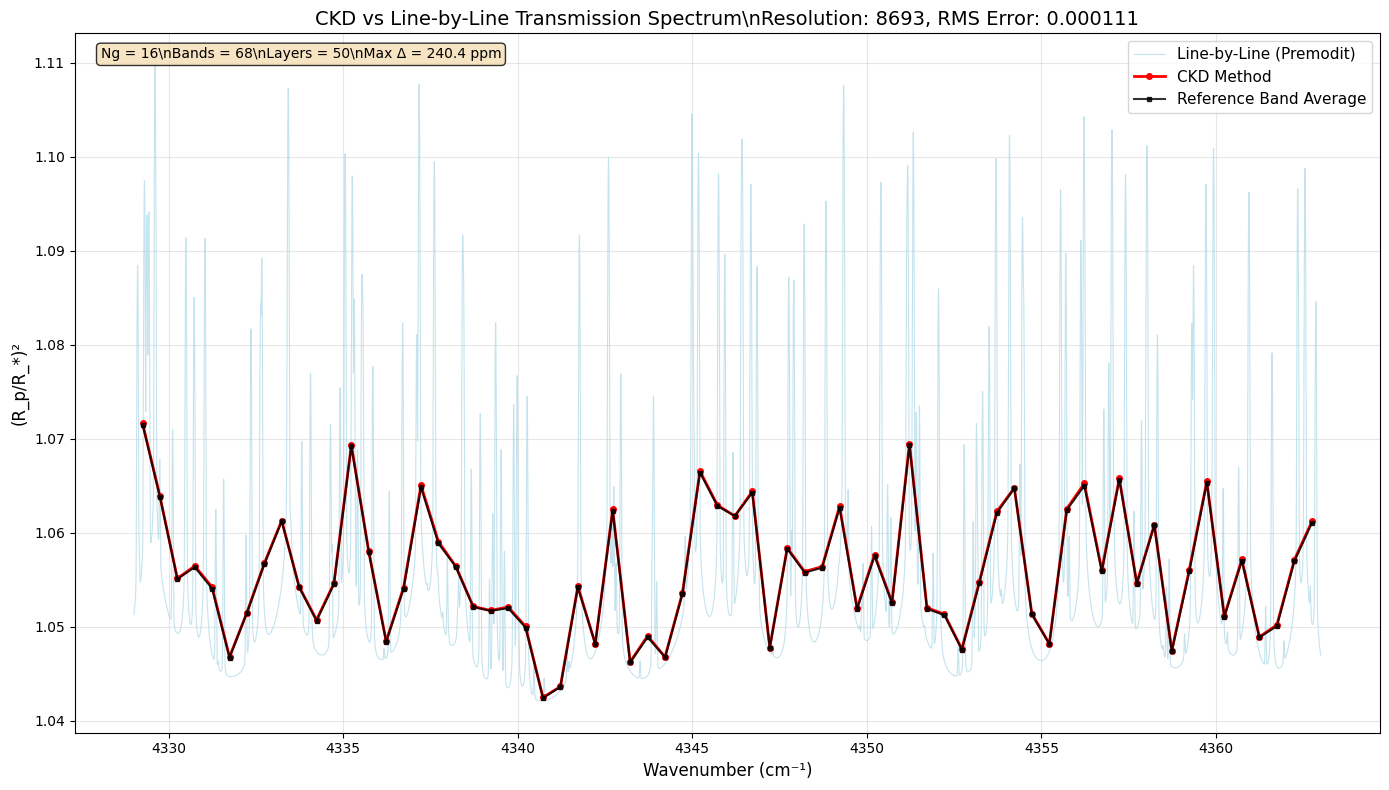

Figure saved as: ckd_transmission_comparison_res8693.png


<Figure size 640x480 with 0 Axes>

In [8]:
# Create comparison plot
plt.figure(figsize=(14, 8))

# Plot line-by-line spectrum (high resolution)
plt.plot(nu_grid, transit_lbl, 
         label="Line-by-Line (Premodit)", 
         alpha=0.7, linewidth=0.8, color='lightblue')

# Plot CKD spectrum
plt.plot(opa_ckd.nu_bands, transit_ckd, 
         'o-', label="CKD Method", 
         markersize=4, linewidth=2, color='red')

# Plot reference band averages
plt.plot(opa_ckd.nu_bands, transit_avg, 
         's-', label="Reference Band Average", 
         markersize=3, linewidth=1.5, color='black', alpha=0.8)

plt.xlabel('Wavenumber (cm⁻¹)', fontsize=12)
plt.ylabel('(R_p/R_*)²', fontsize=12)
plt.title(f'CKD vs Line-by-Line Transmission Spectrum\\n'
          f'Resolution: {resolution:.0f}, RMS Error: {res:.6f}', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add text box with key parameters
textstr = f'Ng = {opa_ckd.Ng}\\nBands = {len(opa_ckd.nu_bands)}\\nLayers = {art.nlayer}\\nMax Δ = {np.max(transit_diff_ppm):.1f} ppm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig(f"ckd_transmission_comparison_res{resolution:.0f}.png", 
            dpi=300, bbox_inches='tight')
print(f"Figure saved as: ckd_transmission_comparison_res{resolution:.0f}.png")

## Summary

This tutorial demonstrated how to use the CKD method with ExoJAX for transmission spectroscopy:

### Key Steps:
1. **Setup**: Initialize atmospheric model and molecular database for transmission
2. **Profiles**: Define temperature, mixing ratio, and planetary parameters
3. **Line-by-Line**: Compute high-resolution transmission spectrum
4. **CKD Setup**: Initialize CKD calculator and pre-compute tables
5. **CKD Calculation**: Compute band-averaged transmission spectrum using CKD
6. **Validation**: Compare CKD results with line-by-line band averages
7. **Visualization**: Plot comparison and analyze accuracy in ppm

